## Timeseries plot with error bands

In [1]:
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [3]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.6+ KB


estimator는 기본값이 mean으로 되어 있고, ci(신뢰구간)은 95%가 기본값으로 되어있다.

선을 중심으로 색칠되어 있는게 신뢰구간이다.

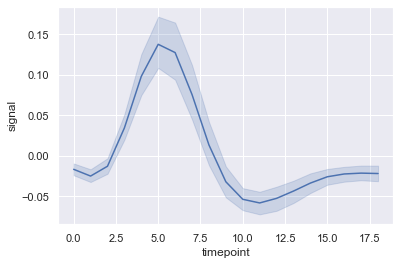

In [4]:
sns.lineplot(data = fmri, x='timepoint', y='signal')

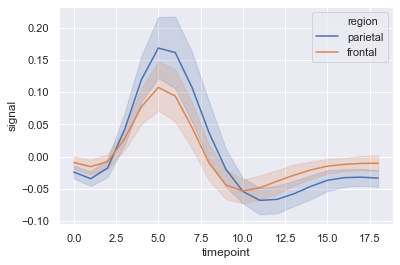

In [7]:
sns.lineplot(data = fmri, x='timepoint', y='signal', hue='region')

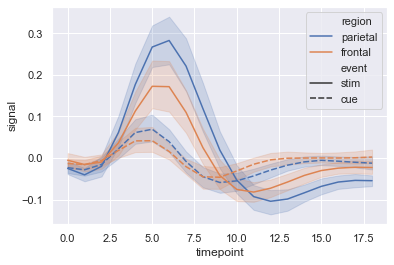

In [8]:
sns.lineplot(data = fmri, x='timepoint', y='signal', hue='region', style='event')

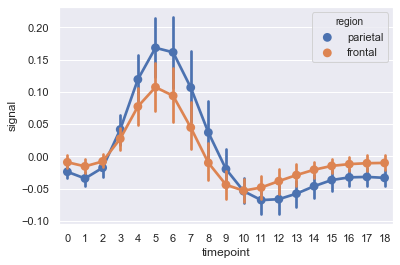

In [10]:
sns.pointplot(data = fmri, x='timepoint', y='signal', hue='region')

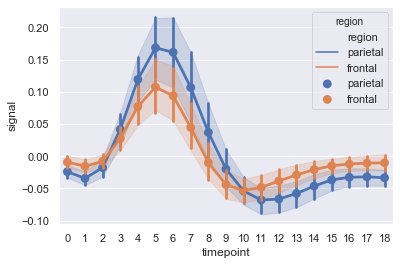

In [12]:
sns.lineplot(data = fmri, x='timepoint', y='signal', hue='region')
sns.pointplot(data = fmri, x='timepoint', y='signal', hue='region')

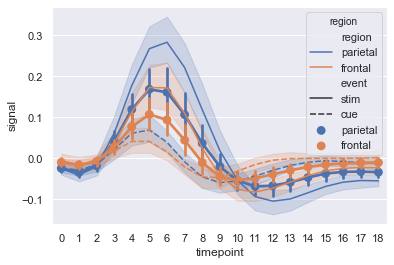

In [13]:
sns.lineplot(data = fmri, x='timepoint', y='signal', hue='region', style='event')
sns.pointplot(data = fmri, x='timepoint', y='signal', hue='region')

## Lineplot from a wide_form dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
rs = np.random.RandomState(365)
rs

In [18]:
values = rs.randn(365, 4).cumsum(axis=0)
values

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

In [21]:
pd.DataFrame(values).head()

,0,1,2,3
0,0.167921,0.523505,0.817376,1.703846
1,-1.979026,1.237704,0.057230,2.743267
2,-2.945478,1.094025,1.628355,2.359988
3,-2.307479,0.749367,1.624072,2.518347
4,-3.270573,0.333310,1.867085,2.866550


In [22]:
pd.DataFrame(values).shape

(365, 4)

In [23]:
dates = pd.date_range('1 1 2016', periods=365, freq="D")
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [28]:
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data.head(1)

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846


1월 1일 부터 12월 30일까지 랜덤한 데이터가 들어가 있다.

In [29]:
data.tail(1)

,A,B,C,D
2016-12-30,-20.767716,11.011414,-7.941476,19.358112


아래 코드는 일주일 간격으로 이동평균값을 찍게 된다.

In [30]:
data = data.rolling(7).mean()
data.head(14)

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,-2.452745,1.051882,0.869730,2.501669
2016-01-08,-2.947736,1.154990,0.861469,2.497520
2016-01-09,-3.321732,1.161639,1.080810,2.444158
2016-01-10,-3.469003,1.309605,1.126083,2.298421


In [31]:
data.tail(14)

,A,B,C,D
2016-12-17,-17.913615,9.686574,-9.308342,9.685148
2016-12-18,-18.261967,9.624720,-9.361306,10.221487
2016-12-19,-18.315589,9.664920,-9.405662,10.745813
2016-12-20,-18.359606,9.634288,-9.685893,11.307823
2016-12-21,-18.514335,9.778522,-10.379443,11.950511
2016-12-22,-18.609853,9.687617,-10.681706,12.554349
2016-12-23,-18.720245,9.814479,-11.173117,13.195721
2016-12-24,-18.513297,9.938205,-11.629620,14.019907
2016-12-25,-18.343743,10.090349,-11.943473,14.491399
2016-12-26,-18.482826,10.330142,-12.108625,14.878444


C:\Users\sejin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


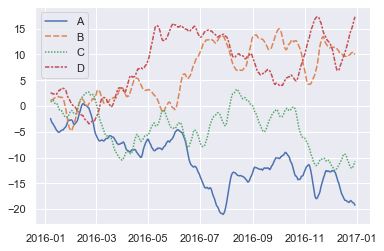

In [32]:
sns.lineplot(data=data)

x, y축을 지정하지 않고 data를 넣었더니 모든 컬럼들을 그렸다.

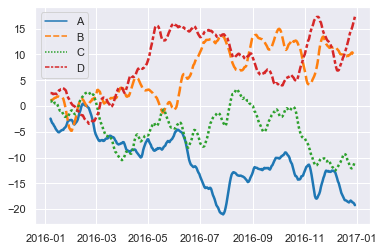

In [33]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)